In [1]:
import pickle
import arviz as ar
import matplotlib.pyplot as plt
import numpy as np


In [2]:
datafile = '/home/derick/experiments/sampling_convergence/num_samples_5000.0000/results.pkl'
with open(datafile, 'rb') as f:
    fit = pickle.load(f)


In [3]:
summary = ar.summary(fit)


In [4]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
eci[0],0.001,0.002,-0.002,0.005,0.000,0.000,1611.0,3816.0,1.00
eci[1],-0.519,0.019,-0.556,-0.484,0.001,0.000,863.0,2859.0,1.00
eci[2],0.797,0.044,0.717,0.883,0.002,0.001,603.0,1651.0,1.01
eci[3],0.306,0.034,0.244,0.371,0.001,0.001,612.0,1401.0,1.01
eci[4],-0.057,0.050,-0.148,0.015,0.003,0.002,367.0,660.0,1.00
...,...,...,...,...,...,...,...,...,...
eci_variance[249],0.021,0.021,0.000,0.059,0.001,0.000,1096.0,1156.0,1.00
eci_variance[250],0.025,0.023,0.000,0.066,0.001,0.000,973.0,1400.0,1.01
eci_variance[251],0.017,0.018,0.000,0.049,0.000,0.000,1167.0,1602.0,1.00
eci_variance[252],0.018,0.018,0.000,0.050,0.000,0.000,1217.0,1997.0,1.00


In [5]:
rhat = ar.rhat(fit)

In [6]:
print(rhat)

<xarray.Dataset>
Dimensions:             (eci_dim_0: 253, eci_variance_dim_0: 253)
Coordinates:
  * eci_dim_0           (eci_dim_0) int64 0 1 2 3 4 5 ... 248 249 250 251 252
  * eci_variance_dim_0  (eci_variance_dim_0) int64 0 1 2 3 4 ... 249 250 251 252
Data variables:
    eci                 (eci_dim_0) float64 1.002 1.003 1.008 ... 1.003 1.005
    eci_variance        (eci_variance_dim_0) float64 1.002 1.004 ... 1.003 1.003
    sigma               float64 1.002


In [7]:
eci_rhat = rhat['eci']


In [8]:
index = list(range(eci_rhat.shape[0]))

<xarray.DataArray 'eci' ()>
array(1.0049658)


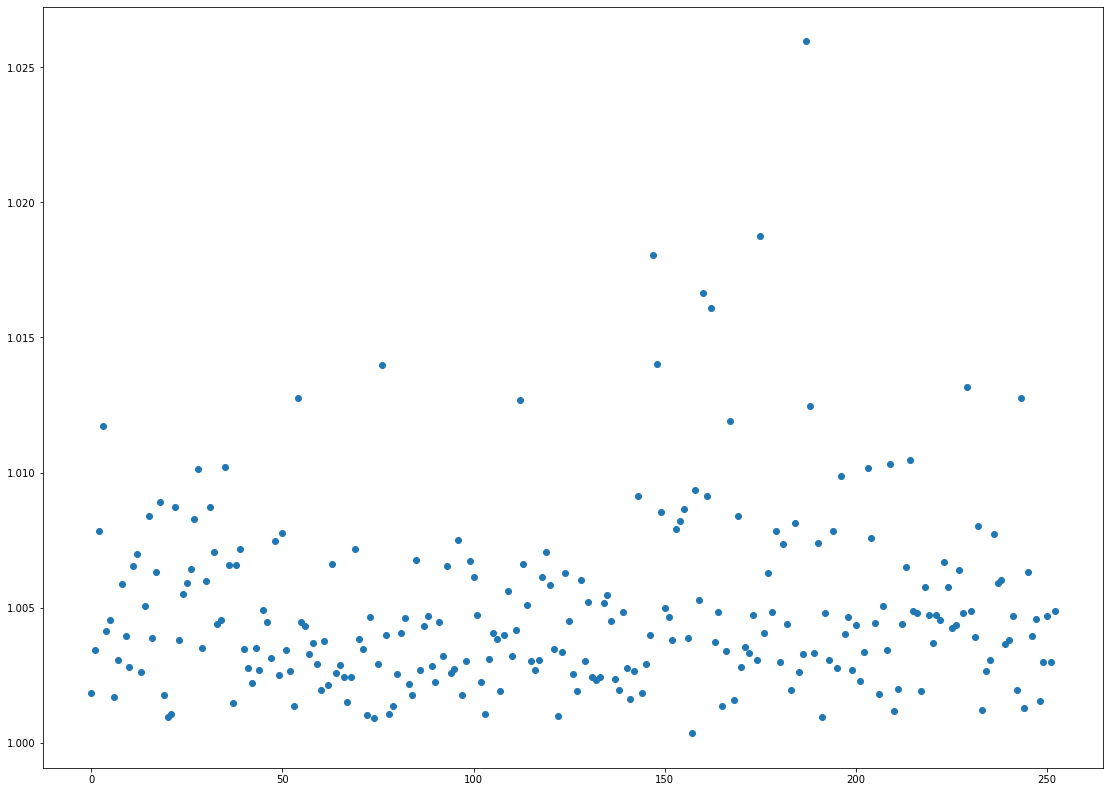

In [9]:
plt.scatter(index, eci_rhat)
print(np.mean(eci_rhat))
fig = plt.gcf()
fig.set_size_inches(19,14)
plt.show()

<xarray.DataArray 'eci_variance' ()>
array(1.00411207)


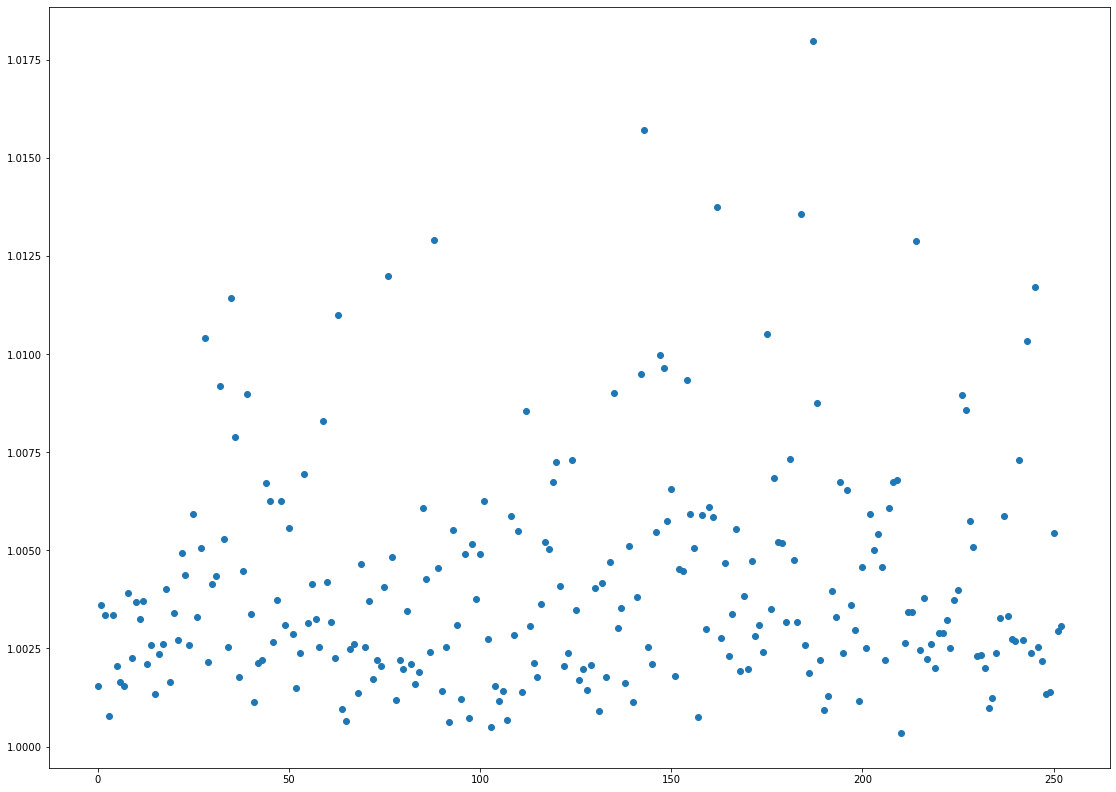

In [10]:
plt.scatter(index, rhat['eci_variance'])
print(np.mean(rhat['eci_variance']))
fig = plt.gcf()
fig.set_size_inches(19,14)
plt.show()

0.004849037143750295


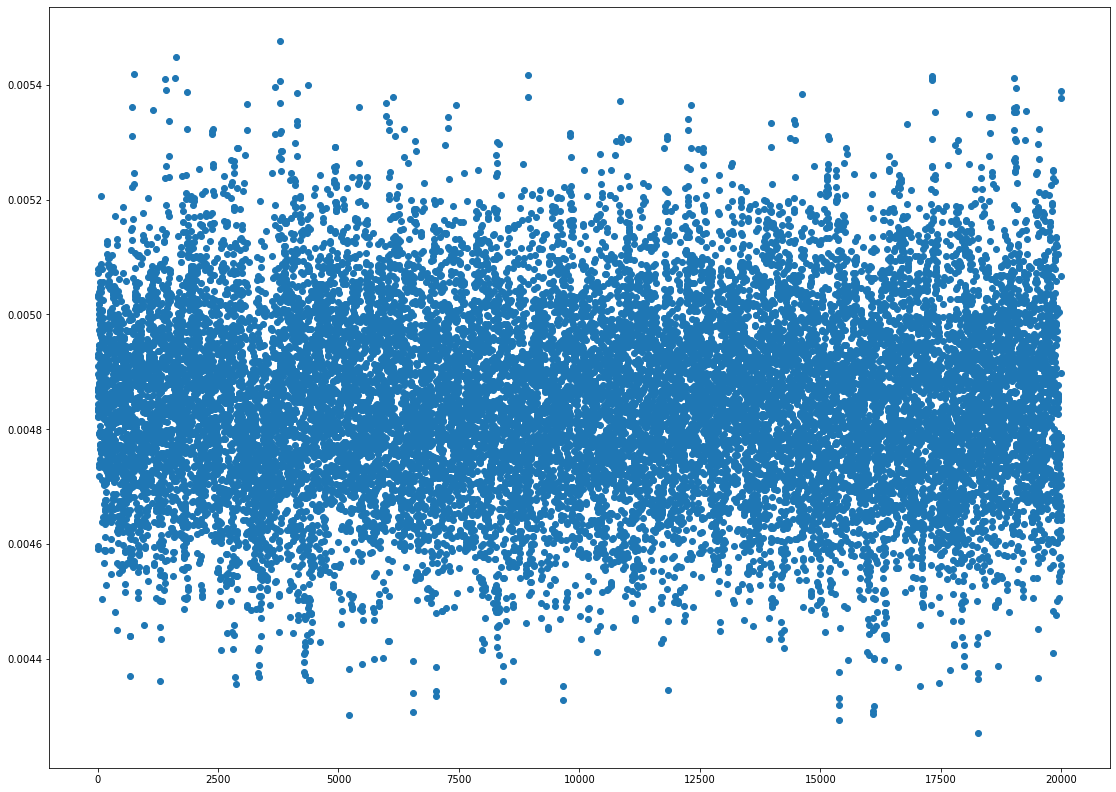

In [11]:
sigmas = np.squeeze(fit['sigma'])
sigma_index = list(range(sigmas.shape[0]))
plt.scatter(sigma_index, sigmas)
print(np.mean(sigmas))
fig = plt.gcf()
fig.set_size_inches(19,14)
plt.show()

In [12]:
estimated_sample_size = ar.ess(fit)

In [13]:
print(estimated_sample_size)

<xarray.Dataset>
Dimensions:             (eci_dim_0: 253, eci_variance_dim_0: 253)
Coordinates:
  * eci_dim_0           (eci_dim_0) int64 0 1 2 3 4 5 ... 248 249 250 251 252
  * eci_variance_dim_0  (eci_variance_dim_0) int64 0 1 2 3 4 ... 249 250 251 252
Data variables:
    eci                 (eci_dim_0) float64 1.611e+03 863.5 ... 885.6 1.195e+03
    eci_variance        (eci_variance_dim_0) float64 1.326e+03 ... 1.217e+03
    sigma               float64 1.553e+03


In [14]:
m_chain_standard_err = ar.mcse(fit)

In [15]:
print(m_chain_standard_err)

<xarray.Dataset>
Dimensions:             (eci_dim_0: 253, eci_variance_dim_0: 253)
Coordinates:
  * eci_dim_0           (eci_dim_0) int64 0 1 2 3 4 5 ... 248 249 250 251 252
  * eci_variance_dim_0  (eci_variance_dim_0) int64 0 1 2 3 4 ... 249 250 251 252
Data variables:
    eci                 (eci_dim_0) float64 5.028e-05 0.0006536 ... 0.0003961
    eci_variance        (eci_variance_dim_0) float64 0.0002813 ... 0.0004263
    sigma               float64 4.092e-06


array([<AxesSubplot:>], dtype=object)

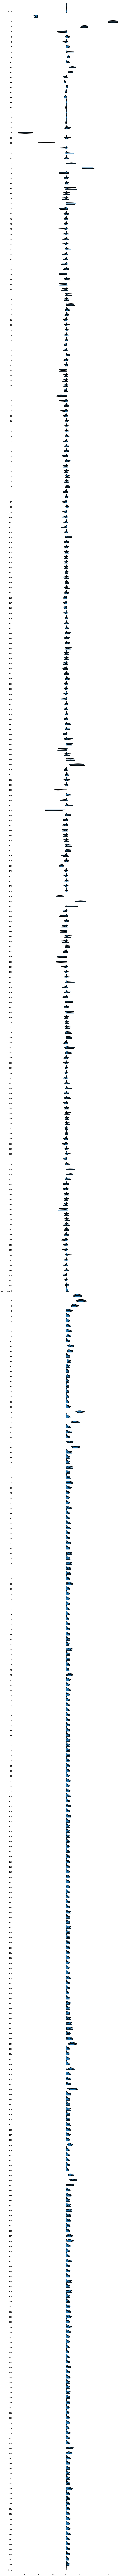

In [16]:
ar.plot_forest(fit, kind='ridgeplot')

/home/derick/anaconda3/envs/thermo/lib/python3.9/site-packages/arviz/plots/plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (2028) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'eci\n0, 0'}>,
        <AxesSubplot:title={'center':'eci\n0, 1'}>,
        <AxesSubplot:title={'center':'eci\n0, 2'}>,
        <AxesSubplot:title={'center':'eci\n0, 3'}>],
       [<AxesSubplot:title={'center':'eci\n0, 4'}>,
        <AxesSubplot:title={'center':'eci\n0, 5'}>,
        <AxesSubplot:title={'center':'eci\n0, 6'}>,
        <AxesSubplot:title={'center':'eci\n0, 7'}>],
       [<AxesSubplot:title={'center':'eci\n0, 8'}>,
        <AxesSubplot:title={'center':'eci\n0, 9'}>,
        <AxesSubplot:title={'center':'eci\n0, 10'}>,
        <AxesSubplot:title={'center':'eci\n0, 11'}>],
       [<AxesSubplot:title={'center':'eci\n0, 12'}>,
        <AxesSubplot:title={'center':'eci\n0, 13'}>,
        <AxesSubplot:title={'center':'eci\n0, 14'}>,
        <AxesSubplot:title={'center':'eci\n0, 15'}>],
       [<AxesSubplot:title={'center':'eci\n0, 16'}>,
        <AxesSubplot:title={'center':'eci\n0, 17'}>,
        <AxesSubplot:title={'center':'eci\n0, 18'}>,

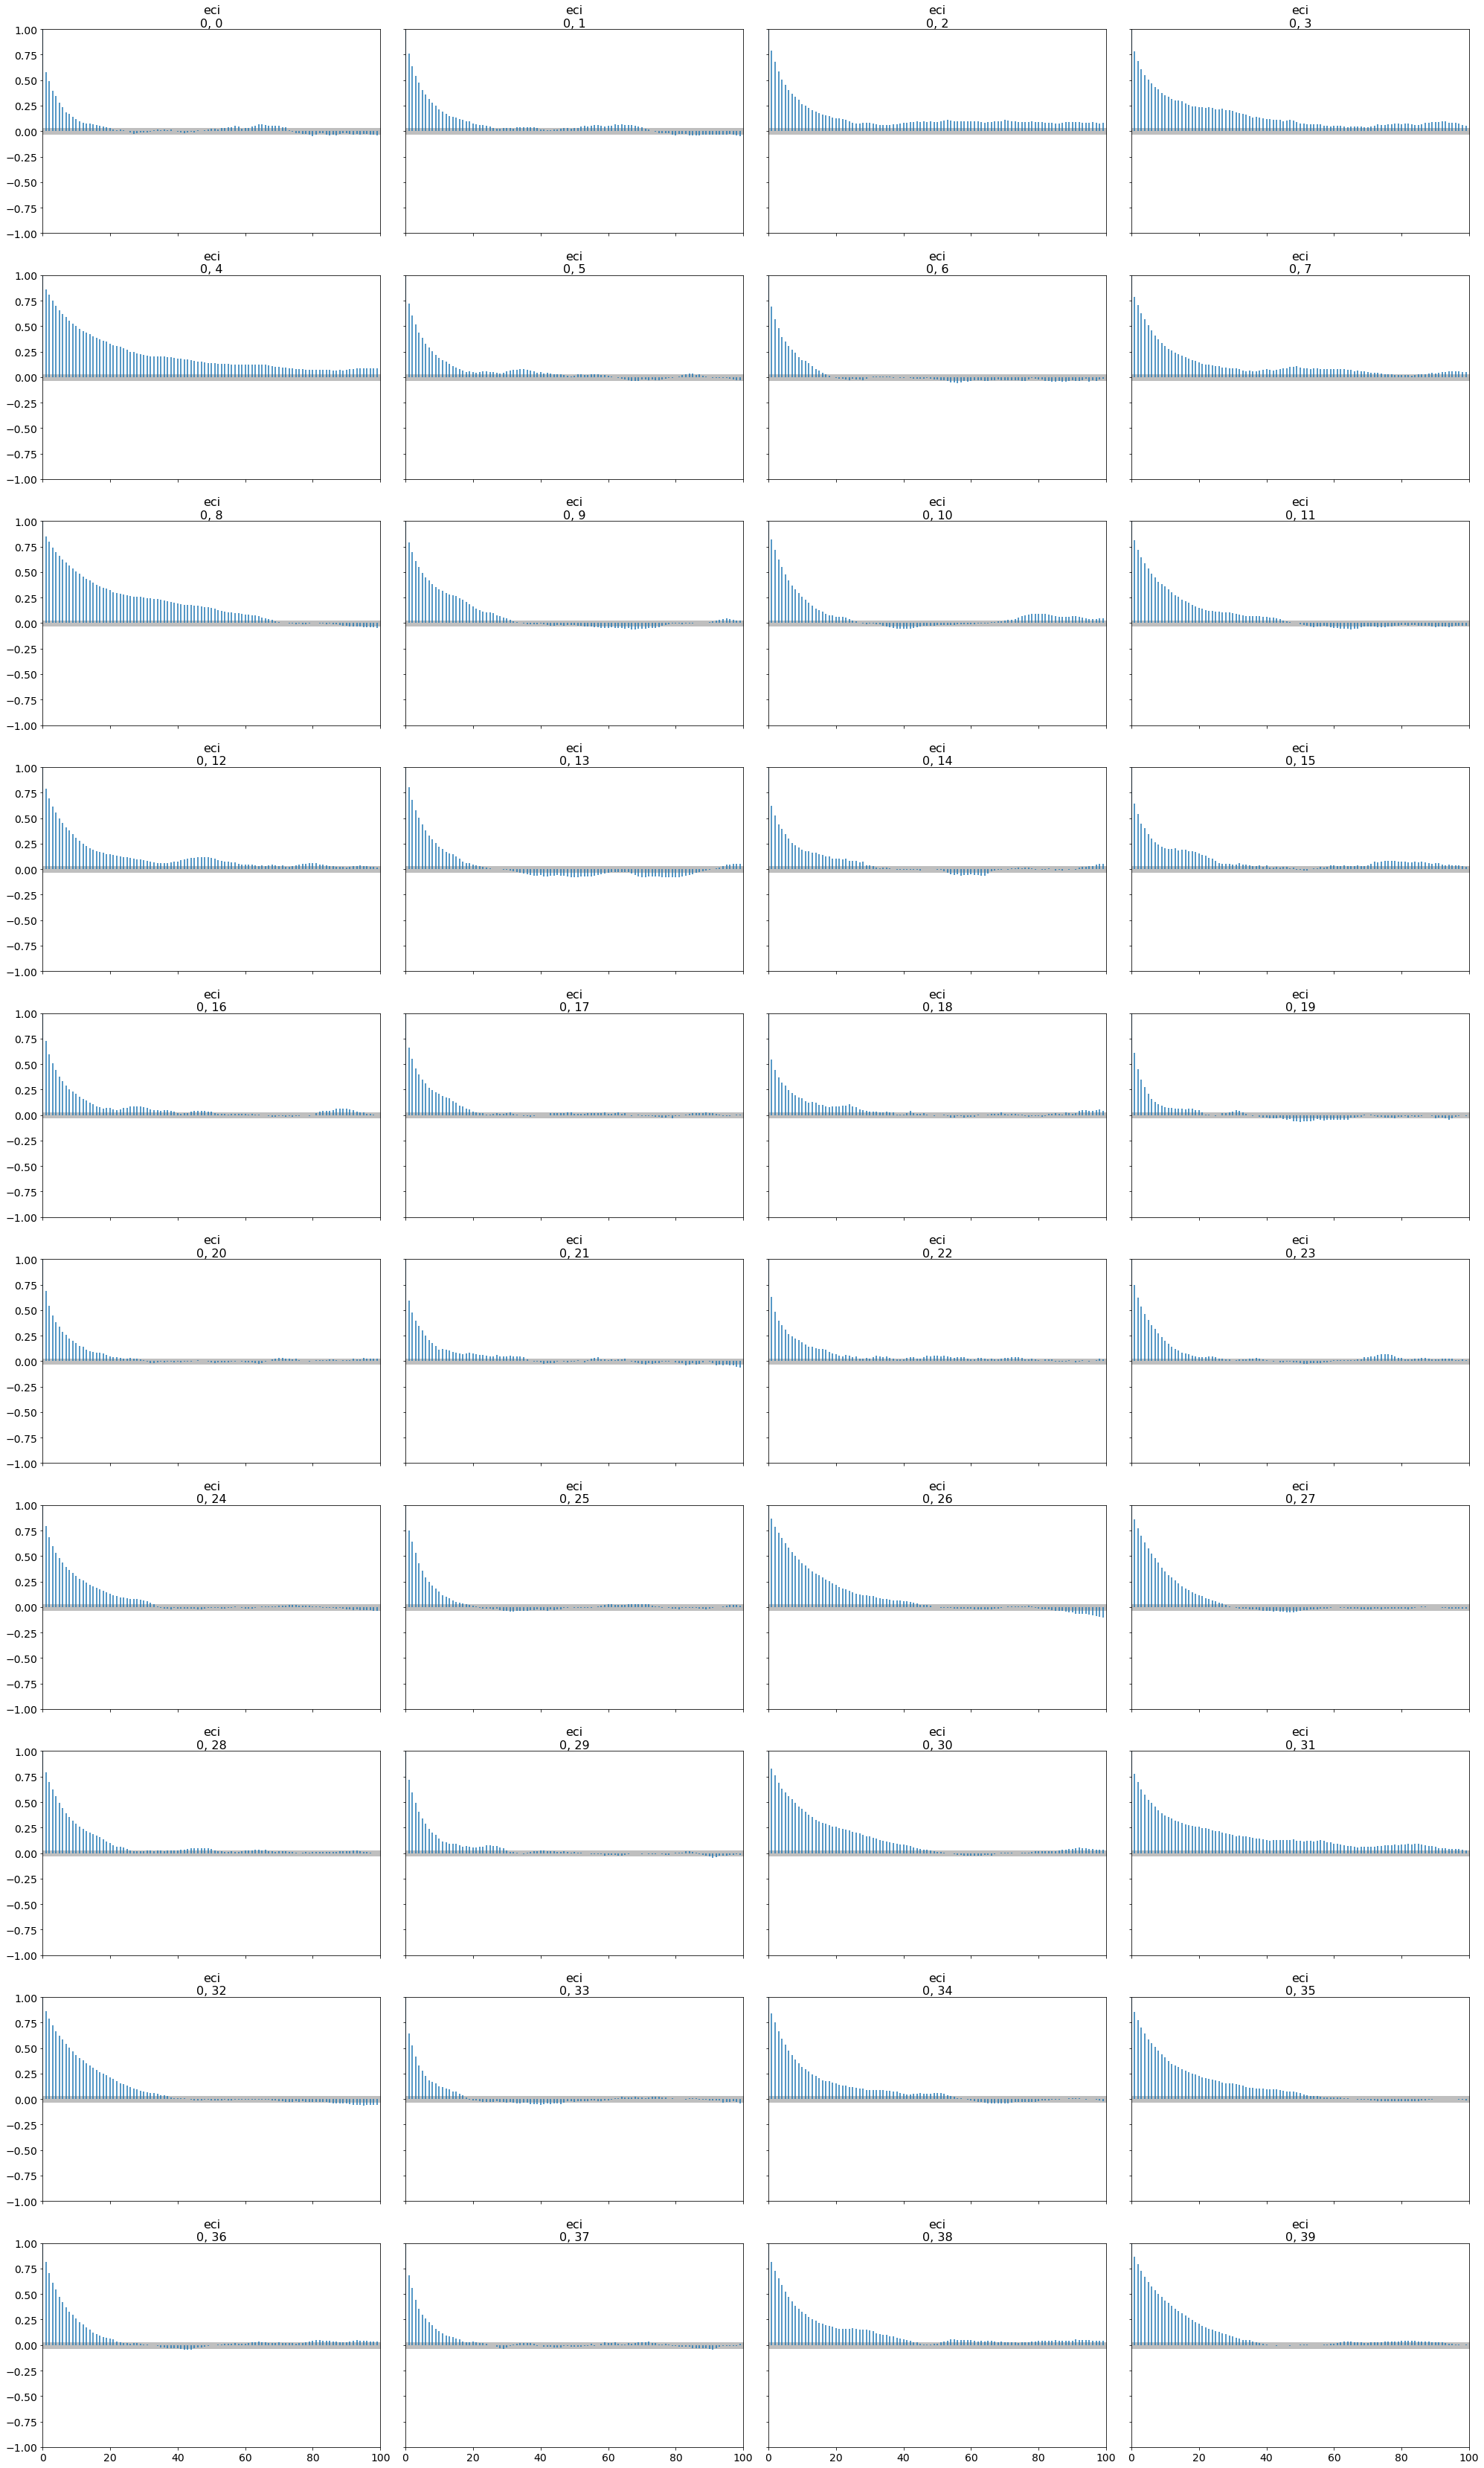

In [17]:
ar.plot_autocorr(fit)

In [18]:
#ar.plot_ess(fit)